**Part 2: Classification on red and white wine characteristics**

In [ ]:
import pandas as pd

red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

separator = ';'

red_wine_df = pd.read_csv(red_wine_url, sep=separator)
white_wine_df = pd.read_csv(white_wine_url, sep=separator)

red_wine_df.head()


In [ ]:
white_wine_df.head()

In [ ]:
red_wine_df['winetype']=1
white_wine_df['winetype']=0
df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'Number of Wine')

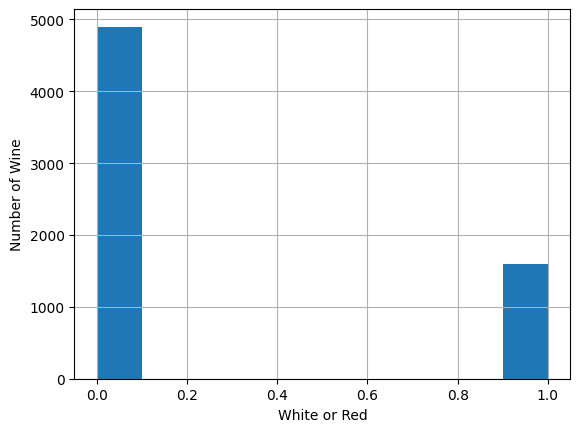

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
df['winetype'].hist()
plt.xlabel('White or Red')
plt.ylabel('Number of Wine')

Text(0, 0.5, 'Number of Wine')

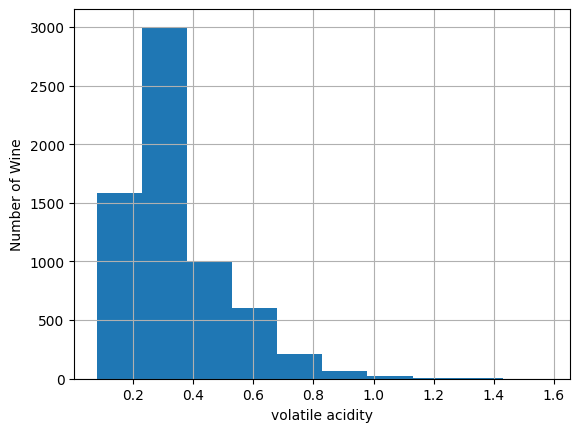

In [ ]:
df['volatile acidity'].hist()
plt.xlabel('volatile acidity')
plt.ylabel('Number of Wine')

Text(0, 0.5, 'Number of Wine')

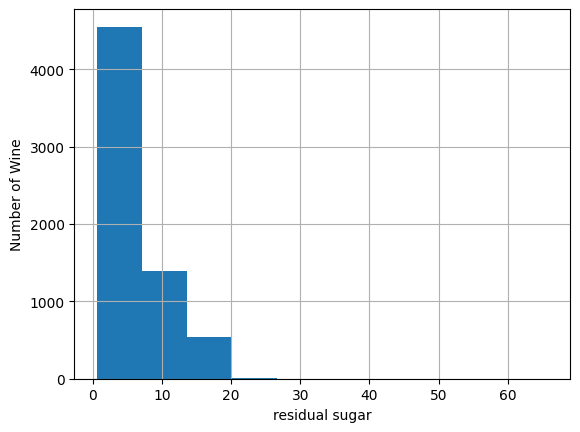

In [ ]:
df['residual sugar'].hist()
plt.xlabel('residual sugar')
plt.ylabel('Number of Wine')

Text(0, 0.5, 'Number of Wine')

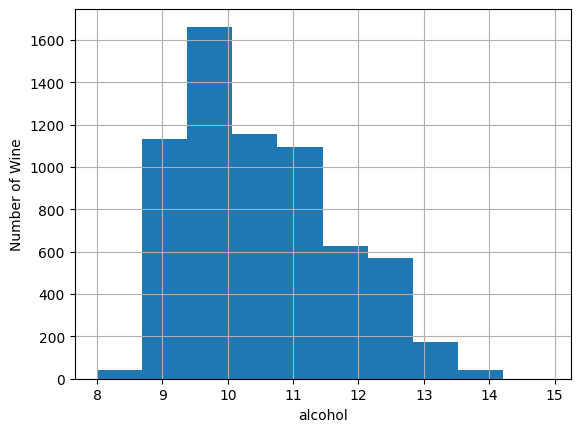

In [ ]:
df['alcohol'].hist()
plt.xlabel('alcohol')
plt.ylabel('Number of Wine')

2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation.

In [ ]:
y=df['winetype']
X=df.loc[:, df.columns != 'winetype']
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

X_train.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

logistic_model = LogisticRegression()
penalized_logistic_model = LogisticRegression(penalty='l2')
knn_model = KNeighborsClassifier()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv_accuracy_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_p_logistic = cross_val_score(penalized_logistic_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_knn_scaled = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

logistic_model.fit(X_train, y_train)
penalized_logistic_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)

print("logistic_model.coef_: {}".format(logistic_model.coef_))
print("Cross-Validation Accuracy (Logistic Regression):", cv_accuracy_logistic.mean())
print("penalized_logistic_model.coef_: {}".format(penalized_logistic_model.coef_))
print("Cross-Validation Accuracy (Penalized Logistic Regression):", cv_accuracy_p_logistic.mean())

print("Cross-Validation Accuracy (KNN without scaling):", cv_accuracy_knn.mean())
print("Cross-Validation Accuracy (KNN with scaling):", cv_accuracy_knn_scaled.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

logistic_model.coef_: [[ 0.67936692  8.20240891 -1.3607246  -0.18460758  1.39354882  0.05140585
  -0.06523268 -1.36963     1.37548048  6.8224932  -0.82087606 -0.07137195]]
Cross-Validation Accuracy (Logistic Regression): 0.9772162375612068
penalized_logistic_model.coef_: [[ 0.67936692  8.20240891 -1.3607246  -0.18460758  1.39354882  0.05140585
  -0.06523268 -1.36963     1.37548048  6.8224932  -0.82087606 -0.07137195]]
Cross-Validation Accuracy (Penalized Logistic Regression): 0.9772162375612068
Cross-Validation Accuracy (KNN without scaling): 0.939653767177381
Cross-Validation Accuracy (KNN with scaling): 0.993637234770705


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**How different are the results? How does scaling the data with StandardScaler influence the results?**

The results for logistic regression and penalized logistic regression were identical. Their cross validation accuracy was both 0.9772162375612068. Whereas KNN experienced a significant improvement in accuracy from scalling, from 0.939653767177381 to 0.993637234770705.

2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
from sklearn.model_selection import GridSearchCV

penalized_logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

logistic_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

penalized_logistic_grid_search = GridSearchCV(penalized_logistic_model, penalized_logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='accuracy')
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')

penalized_logistic_grid_search.fit(X_train,y_train)
logistic_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train_scaled, y_train)


best_penalized_logistic_params = penalized_logistic_grid_search.best_params_
best_penalized_logistic_score = penalized_logistic_grid_search.best_score_

best_logistic_params = logistic_grid_search.best_params_
best_logistic_score = logistic_grid_search.best_score_

best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

print("Best Penalized Logistic Regression Parameters:", best_penalized_logistic_params)
print("Best Penalized Logistic Regression Score (Accuracy):", best_penalized_logistic_score)

print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Accuracy):", best_logistic_score)

print("Best K-Nearest Neighbors Parameters:", best_knn_params)
print("Best K-Nearest Neighbors Score (Accuracy):", best_knn_score)

Best Penalized Logistic Regression Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Penalized Logistic Regression Score (Accuracy): 0.9878898541567945
Best Logistic Regression Parameters: {'C': 10.0, 'solver': 'liblinear'}
Best Logistic Regression Score (Accuracy): 0.986658663718212
Best K-Nearest Neighbors Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best K-Nearest Neighbors Score (Accuracy): 0.9944583794029379


**Do the results improve?**

It slightly improved.


2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling.

In [ ]:
from sklearn.model_selection import KFold

penalized_logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

logistic_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

penalized_logistic_grid_search = GridSearchCV(penalized_logistic_model, penalized_logistic_param_grid, cv=kf, scoring='accuracy')
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=kf, scoring='accuracy')
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=kf, scoring='accuracy')

penalized_logistic_grid_search.fit(X_train,y_train)
logistic_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train_scaled, y_train)


best_penalized_logistic_params = penalized_logistic_grid_search.best_params_
best_penalized_logistic_score = penalized_logistic_grid_search.best_score_

best_logistic_params = logistic_grid_search.best_params_
best_logistic_score = logistic_grid_search.best_score_

best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

print("Best Penalized Logistic Regression Parameters:", best_penalized_logistic_params)
print("Best Penalized Logistic Regression Score (Accuracy):", best_penalized_logistic_score)

print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Accuracy):", best_logistic_score)

print("Best K-Nearest Neighbors Parameters:", best_knn_params)
print("Best K-Nearest Neighbors Score (Accuracy):", best_knn_score)

Best Penalized Logistic Regression Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Penalized Logistic Regression Score (Accuracy): 0.9870691307323751
Best Logistic Regression Parameters: {'C': 10.0, 'solver': 'liblinear'}
Best Logistic Regression Score (Accuracy): 0.985427052071816
Best K-Nearest Neighbors Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best K-Nearest Neighbors Score (Accuracy): 0.9940481229926814


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

penalized_logistic_grid_search = GridSearchCV(penalized_logistic_model, penalized_logistic_param_grid, cv=kf, scoring='accuracy')
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=kf, scoring='accuracy')
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=kf, scoring='accuracy')

penalized_logistic_grid_search.fit(X_train,y_train)
logistic_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train_scaled, y_train)


best_penalized_logistic_params = penalized_logistic_grid_search.best_params_
best_penalized_logistic_score = penalized_logistic_grid_search.best_score_

best_logistic_params = logistic_grid_search.best_params_
best_logistic_score = logistic_grid_search.best_score_

best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

print("Best Penalized Logistic Regression Parameters:", best_penalized_logistic_params)
print("Best Penalized Logistic Regression Score (Accuracy):", best_penalized_logistic_score)

print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Accuracy):", best_logistic_score)

print("Best K-Nearest Neighbors Parameters:", best_knn_params)
print("Best K-Nearest Neighbors Score (Accuracy):", best_knn_score)

Best Penalized Logistic Regression Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Penalized Logistic Regression Score (Accuracy): 0.9880951929658295
Best Logistic Regression Parameters: {'C': 10.0, 'solver': 'liblinear'}
Best Logistic Regression Score (Accuracy): 0.9852208708471544
Best K-Nearest Neighbors Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best K-Nearest Neighbors Score (Accuracy): 0.9938429947875533


**Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?**

The parameter was unchanged with shuffle/unshuffle but changed when random state of the split altered.

Before:Best K-Nearest Neighbors Parameters: {'n_neighbors': 7, 'weights': 'distance'}

After:Best K-Nearest Neighbors Parameters: {'n_neighbors': 9, 'weights': 'distance'}.

2.5 Lastly, discuss which final model you would choose to predict new data.

I would like to choose the KNN with parameter n_neighbors: 7, weights: distance as my final model.
As we known, KNN is a non-parametric algorithm that relies on the similarity of data points to make predictions. It doesn't make strong assumptions about the underlying data distribution. The distribution of explanatory variables we plotted are somehow equally distributed instead of exhibiting two polar points. In this case, KNN can be effective because we suspect that similar data points are likely to have similar target values.
